# Modeller
All baselines are run on the same test set i.e. a subset of the original data set. 
The baselines included in this script are:
- Random model - choosing and ranking candidates randomly from the test set
- Plain Mergesort model - choosing and ranking candidates from the test set based on best grades in high school
- Mergesort w. gender accountability - choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking)
- Plain Xgboost regression model -
- Xgboost regression model without sensitive attributes - 

Fair model:
- Xgboost regression model account for diversity 


In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np
import random 
from sklearn.utils import shuffle


## Plots setup


In [2]:

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()



## Load dataset


In [105]:
df = pd.read_csv("X_test_STRATUM_y_test.csv")
df = df.drop(["Unnamed: 0"], axis=1).rename(columns = {"Unnamed: 0.1":"Unnamed: 0"})
df_new = pd.read_csv("NEW_X_test_y_test.csv") 
df_new = pd.concat([df_new, df.STRATUM], axis=1)
df = df_new.copy()
# df er nu det, der er lavet på seed 24 og det er baseret på GUDF


# NEW AND BIG DATASET OF X_TEST AND Y_TEST
df = pd.read_csv("X_test_STRATUM_y_test.csv") 
df = df.drop(["Unnamed: 0"], axis=1).rename(columns = {"Unnamed: 0.1":"Unnamed: 0"})
df_new = pd.read_csv('dfs_test199 copy 3.csv')
df_new = pd.concat([df_new, df.STRATUM], axis=1)
df = df_new.copy()
dfs_test  = df_new.copy()

dfs_test_use = np.array_split(dfs_test, 200)

BIG = pd.DataFrame()
for i in range(200):
    # dfs_test_use[i]= dfs_test_use[i].sort_values(by="4", ascending=False, kind="mergesort")
    dfs_test_use[i]= dfs_test_use[i].reset_index()
    BIG = BIG.append(dfs_test_use[i])

BIG.index.names = ['INDEXES']


# X_test_y_test_FULL_SORTED = pd.DataFrame()
# for i in range(200):
#     dfs_test_use[i]= dfs_test_use[i].sort_values(by="4", ascending=False, kind="mergesort")
#     dfs_test_use[i]= dfs_test_use[i].reset_index()
#     X_test_y_test_FULL_SORTED = X_test_y_test_FULL_SORTED.append(dfs_test_use[i])




In [106]:
BIG

,index,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,STRATUM
INDEXES,,,,,,,,,,,,,,,,,,,,,,
0,0,8174,70,77,91,80.000000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,94.333333,Stratum_4
1,1,3501,82,67,62,71.333333,0,0,0,1,0,0,0,0,1,0,0,0,1,0,81.000000,Stratum_1
2,2,5589,48,38,51,44.000000,1,0,0,1,0,0,0,0,0,0,0,1,0,1,24.000000,Stratum_3
3,3,7569,52,68,56,63.666667,0,0,0,0,0,1,0,0,1,0,0,0,0,1,74.000000,Stratum_1
4,4,1167,66,70,58,66.333333,0,0,0,0,1,0,0,0,0,0,0,1,0,1,81.333333,Stratum_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,819195,11021,70,77,73,78.333333,1,0,0,0,1,0,0,0,1,0,0,0,1,0,89.333333,NaN
4092,819196,5285,60,52,51,48.333333,0,0,0,1,0,0,0,0,1,0,0,0,1,0,60.333333,NaN
4093,819197,2763,46,54,55,55.666667,1,0,0,1,0,0,0,0,1,0,0,0,0,1,49.333333,NaN



# Mergesort Ranker


In [4]:
# ENKELT HERUNDER

df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")


# MERGESORT HERUNDER PÅ BIG 
X_test_y_test_FULL = pd.DataFrame()
for i in range(200):
    dfs_test_use[i]= dfs_test_use[i].sort_values(by="3", ascending=False, kind="mergesort")

    dfs_test_use[i]= dfs_test_use[i].reset_index()
    X_test_y_test_FULL = X_test_y_test_FULL.append(dfs_test_use[i])


X_test_y_test_FULL.index.names = ['INDEXES']

X_test_y_test_FULL_std = X_test_y_test_FULL.groupby('INDEXES').std()
X_test_y_test_FULL_mean=  X_test_y_test_FULL.groupby('INDEXES').mean()

X_test_y_test_FULL_mean = X_test_y_test_FULL_mean.sort_values(by=['18'], ascending=False)
X_test_y_test_FULL_mean["incr_col_mean"] = X_test_y_test_FULL_mean['18'].expanding().mean()
df_sort_BIG =X_test_y_test_FULL_mean


## Gendersort Ranker
Choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking).

Merge sort for Female df and Male df and append and sort


In [121]:
#Gendersort all
def gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER_bin == 0]
    df_F = df_temp[df_temp.GENDER_bin == 1]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
##############
df = pd.read_csv("X_test_STRATUM_y_test.csv") 
df = df.drop(["Unnamed: 0"], axis=1).rename(columns = {"Unnamed: 0.1":"Unnamed: 0"})
df_new = pd.read_csv("NEW_X_test_y_test.csv") 
df_new = pd.concat([df_new, df.STRATUM], axis=1)
df = df_new.copy()
# df er nu det, der er lavet på seed 24 og det er baseret på GUDF

##############
gender_df = gender_mergesort_all(df)


In [136]:
df_temp = BIG.copy()
df_M = df_temp[df_temp['4'] == 0]
df_F = df_temp[df_temp['4'] == 1]

# X_test_y_test_FULL_std = X_test_y_test_FULL.groupby('INDEXES').std()
df_F_mean=  df_F.groupby('Unnamed: 0').mean()
df_F_mean = df_F_mean.sort_values(by=['3'], ascending=False)
df_F_mean["incr_col_mean"] = df_F_mean['3'].expanding().mean()
df_sort_F =df_F_mean.reset_index()
df_sort_F



,Unnamed: 0,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,incr_col_mean
0,5129,410446.500000,76.0,100.0,100.0,100.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,98.666667,100.000000
1,11864,388877.048193,81.0,100.0,93.0,97.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,98.666667,98.833333
2,5673,409577.833333,81.0,100.0,82.0,94.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,94.333333,97.222222
3,1799,408101.507463,100.0,98.0,90.0,92.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,98.666667,96.083333
4,2308,415399.215385,71.0,100.0,83.0,91.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,98.666667,95.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,12367,448392.803030,36.0,38.0,38.0,37.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25.666667,60.788185
5039,3475,428537.287879,49.0,29.0,29.0,37.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.000000,60.783532
5040,9686,416443.534247,63.0,36.0,35.0,36.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20.000000,60.778681
5041,10441,382883.985714,40.0,40.0,31.0,36.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.666667,60.773833


In [146]:
#Gendersort all BIG
def BIG_gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp['4'] == 0]
    df_F = df_temp[df_temp['4'] == 1]

    # X_test_y_test_FULL_std = X_test_y_test_FULL.groupby('INDEXES').std()
    df_F_mean=  df_F.groupby('Unnamed: 0').mean()
    df_F_mean1 = df_F_mean.sort_values(by=['3'], ascending=False)
    df_F_mean1["incr_col_mean"] = df_F_mean1['3'].expanding().mean()
    df_sort_F =df_F_mean1.reset_index()
   

    df_M_mean=  df_M.groupby('Unnamed: 0').mean()
    df_M_mean1 = df_M_mean.sort_values(by=['3'], ascending=False)
    df_M_mean1["incr_col_mean"] = df_M_mean1['3'].expanding().mean()
    df_sort_M =df_M_mean1.reset_index()
    
    
    # df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    # df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_sort_F['3'].max() > df_sort_M['3'].max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        

BIG_gender_df = BIG_gender_mergesort_all(BIG)

In [147]:
BIG_gender_df

,level_0,Unnamed: 0,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,5129,410446.500000,76.0,100.0,100.0,100.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,98.666667
1,0,7340,425867.064935,88.0,95.0,100.0,96.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,96.333333
2,1,4874,434554.584615,97.0,100.0,90.0,96.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,97.333333
3,1,11864,388877.048193,81.0,100.0,93.0,97.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,98.666667
4,2,5673,409577.833333,81.0,100.0,82.0,94.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,94.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,7363,3588,380415.119403,53.0,24.0,35.0,33.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.000000
12407,7364,3741,440447.064516,46.0,29.0,31.0,32.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.000000
12408,7365,1157,404241.048387,50.0,34.0,26.0,32.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.000000
12409,7366,3015,402846.949153,53.0,35.0,26.0,30.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.000000



# UTILITY:

### Mergesort utility


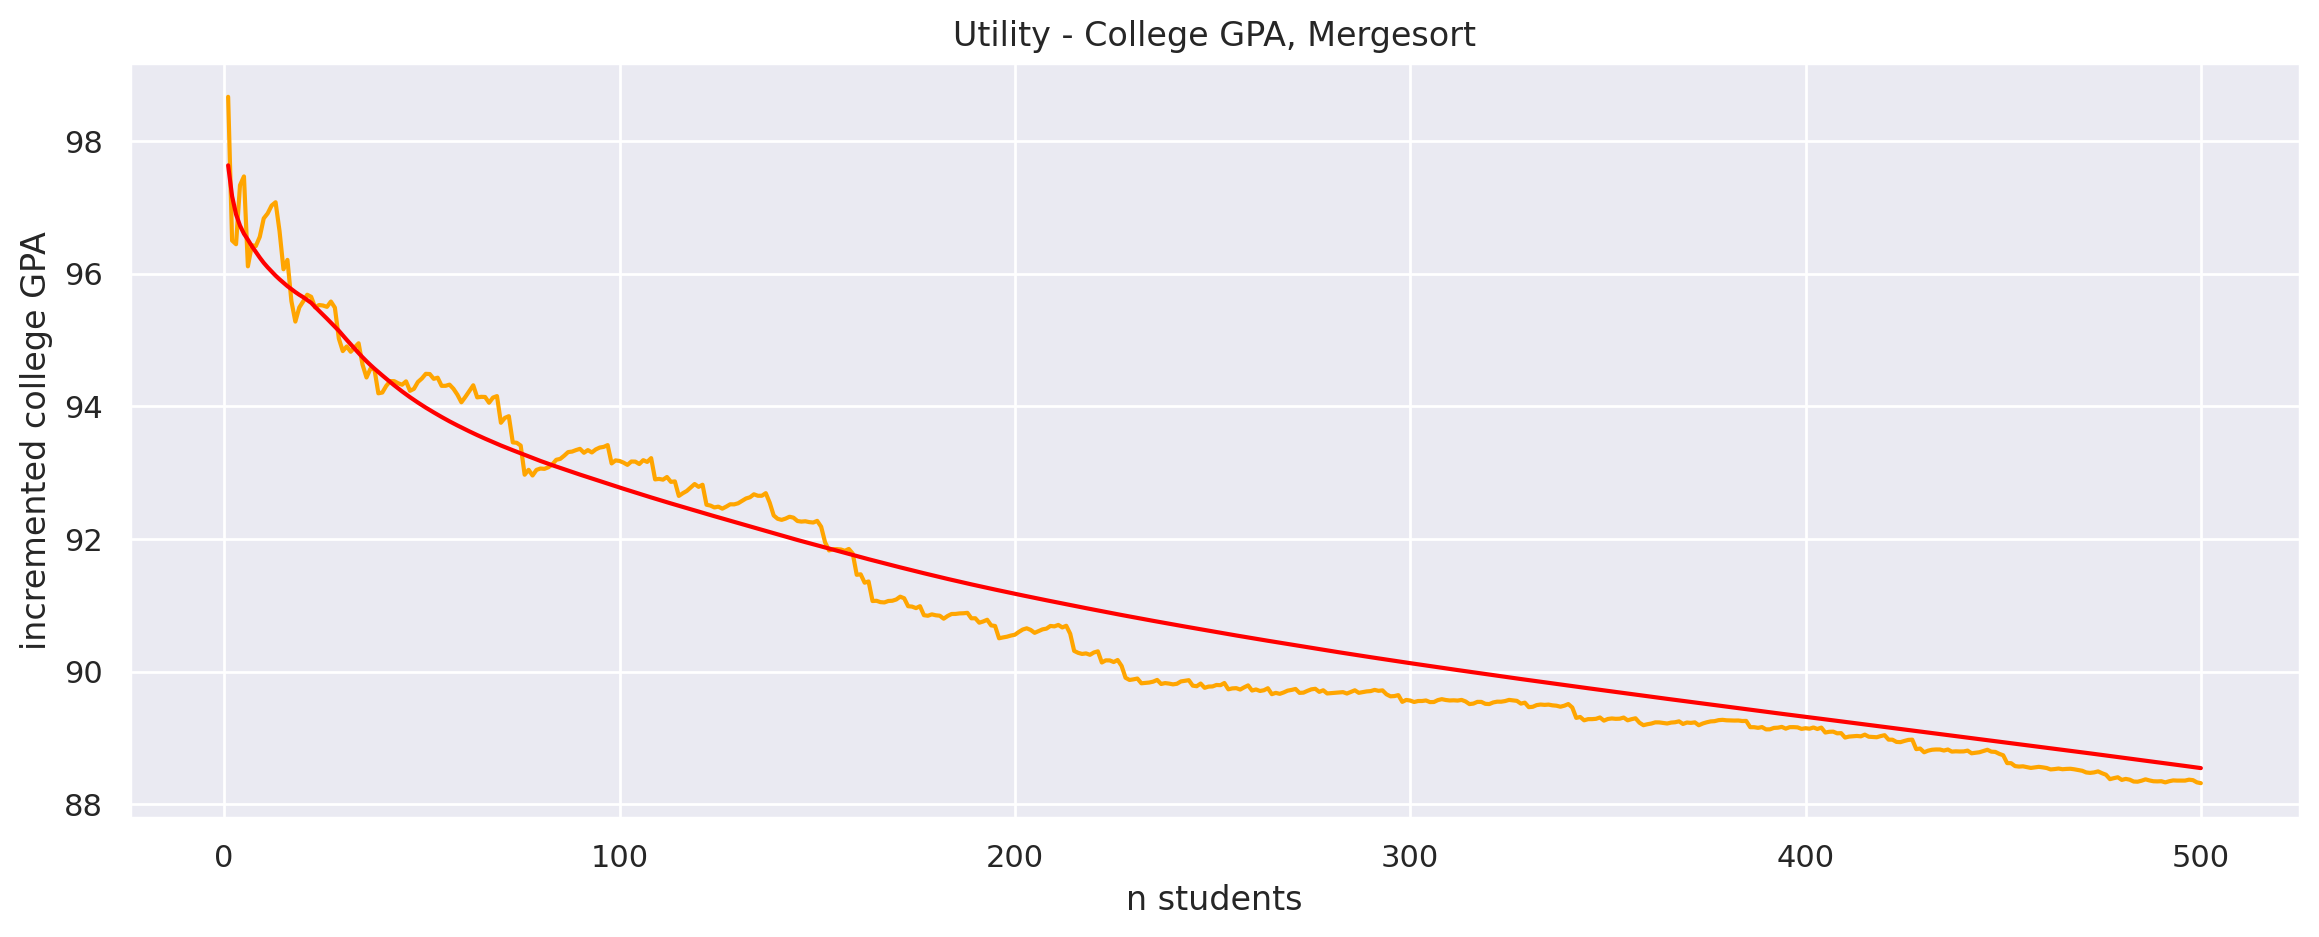

In [84]:
df_avg = df_sort.copy()
df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()
df_avg["n_students"] = range(1,len(df_avg)+1)
sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color="orange").set_title("Utility - College GPA, Mergesort")

df_sort_BIG["n_students"] = range(1,len(df_sort_BIG)+1)
sns.lineplot(x="n_students", y="incr_col_mean", data=df_sort_BIG[:500], color="red").set_title("Utility - College GPA, Mergesort")

plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.show()





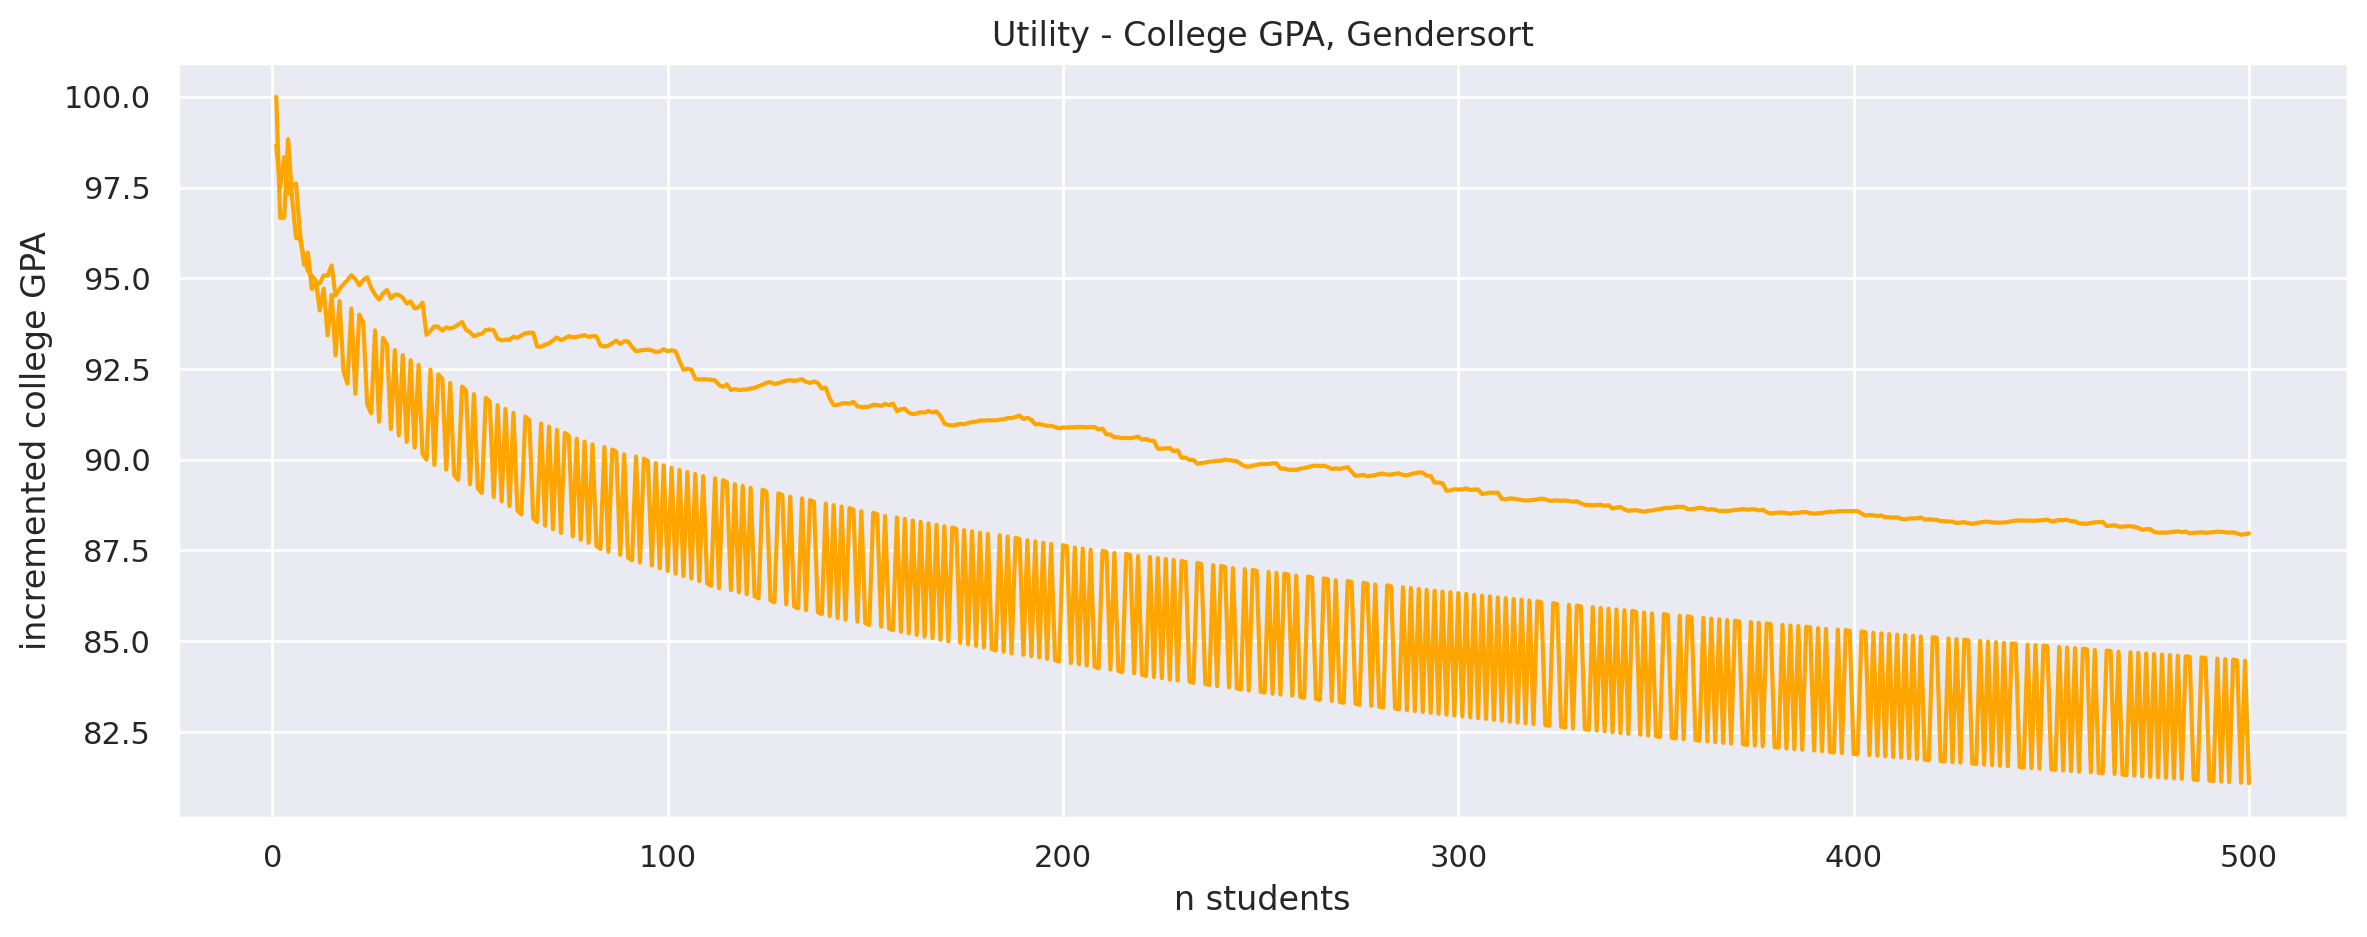

In [138]:

### Gendersort utility

# The gendersort as function of n
#set the incremented col avg as column
gender_df["incr_col_mean"] = gender_df.COL_GRADE_AVG.expanding().mean()
gender_df["n_students"] = range(1,len(gender_df)+1)
# Look of single lineplot of gendersort grades as function of n
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color="orange").set_title("Utility - College GPA, Gendersort")



# BIG

# gender_df["incr_col_mean"] = gender_df.COL_GRADE_AVG.expanding().mean()
BIG_gender_df["n_students"] = range(1,len(BIG_gender_df)+1)
# Look of single lineplot of gendersort grades as function of n
sns.lineplot(x="n_students", y="incr_col_mean", data=BIG_gender_df[:500], color="orange").set_title("Utility - College GPA, Gendersort")


plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.show()




### Random sort utility
2000 samples of random dataframes are generated and plotted with std. as error bars


In [148]:

#Random generated dfs
pd.options.mode.chained_assignment = None 

df_use = df.copy()
df_use = df_use[["Unnamed: 0","COL_GRADE_AVG", "GENDER_bin"]] #"STRATUM"

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_col_mean"] = df_random1.COL_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(1,len(df_random1)+1)
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_col_mean"] = df_random2.COL_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(1,len(df_random2)+1)
        df_random1 = df_random1.append(df_random2)
#The random df to use
df_random1


KeyboardInterrupt: 

In [ ]:
#only take n students from index 1-500
indexs = np.arange(0,500)
df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
df_random_use = df_random_use.reset_index()
#First we plot the random grades per n students
# w 2000 samples
#indexs = np.arange(0,500)
#df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.title("Utility - College GPA, Random") 
plt.show()


### Fairness enhanced XGBoost utility 
##Re ranked plain UTILITY
df_reR = pd.read_csv('re_ranked_PLAIN.csv').copy()
df_reR["incr_col_mean"] = df_reR.Preds.expanding().mean()
df_reR["n_students"] = range(1,len(df_reR)+1)
sns.lineplot(x="n_students", y="incr_col_mean", data=df_reR[:500], color="red").set_title("Utility - College GPA, fairness enhanced XGBoost")
plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.show()
###  Utility: Mergesort, gendersort and random
indexs = np.arange(0,500)
df_random_use_plot = df_random_use.loc[df_random_use['n_students'].isin(indexs)]
df_random_use_plot = df_random_use.reset_index()
df_random_use_plot = df_random_use_plot
# The random grades per n students together with the gendersorted mergesort grades per n students
sns.lineplot(data=df_random_use_plot, x="n_students", y="incr_col_mean", ci="sd")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(x="n_students", y="incr_col_mean", data=df_reR[:500], color="blue")

plt.xlabel('n students')
plt.ylabel('incremented college GPA')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(['Random Ranker',"Mergesort Ranker", "Gendersort Ranker", "Fairness enhanced XGBoost"], loc ="upper right")
plt.show()
# TODO: KØR MED de 200 xgb dfs
## Utility: Plain XGBoost 

Using "preds" as College scores for XGBoost

Det skal tjekkes her, hvilken af de 3 grafer, der faktisk er den rigtige. 
df_plain_TWO = pd.read_csv('TWO_samlet_preds_index_ny_PLAIN.csv')
df_plain_TWO_std = df_plain_TWO.groupby('Unnamed: 0').std()
df_plain_TWO_mean=  df_plain_TWO.groupby('Unnamed: 0').mean()
df_plain_TWO_mean = df_plain_TWO_mean.sort_values(by=['Preds'], ascending=False)
df_plain_TWO_mean["incr_col_mean"] = df_plain_TWO_mean.Preds.expanding().mean()

#cumsum of index to use for plot
df_plain_TWO_mean["n_students"] = range(1,len(df_plain_TWO_mean)+1)
# xgboost 200
Kat_PLAIN_utility = sns.lineplot(data=df_plain_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
# Denne herover tager de mean af de 500 førset af hver df i den 200-compiled df TWO_...
# WO XGBoost

df_wo_TWO = pd.read_csv('TWO_samlet_preds_index_ny_WO.csv')
df_wo_TWO_std = df_wo_TWO.groupby('Unnamed: 0').std()
df_wo_TWO_mean=  df_wo_TWO.groupby('Unnamed: 0').mean()
df_wo_TWO_mean = df_wo_TWO_mean.sort_values(by=['Preds'], ascending=False)
df_wo_TWO_mean["incr_col_mean"] = df_wo_TWO_mean.Preds.expanding().mean()

#cumsum of index to use for plot
df_wo_TWO_mean["n_students"] = range(1,len(df_wo_TWO_mean)+1)

Kat_WO_utility = sns.lineplot(data=df_wo_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="orange" , ci="sd")
Kat_PLAIN_utility = sns.lineplot(data=df_plain_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
# Fairness enhanced Ranker on 200 re-rankings
df_fair_TWO = pd.read_csv('re_ranked_199_NY.csv')
df_fair_TWO_std = df_fair_TWO.groupby('Unnamed: 0').std()
df_fair_TWO_mean=  df_fair_TWO.groupby('Unnamed: 0').mean()
df_fair_TWO_mean = df_fair_TWO_mean.sort_values(by=['Preds'], ascending=False)
df_fair_TWO_mean["incr_col_mean"] = df_fair_TWO_mean.Preds.expanding().mean()

#cumsum of index to use for plot
df_fair_TWO_mean["n_students"] = range(1,len(df_fair_TWO_mean)+1)
# xgboost 200
Kat_FAIR_utility = sns.lineplot(data=df_fair_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
# XGBOOST with senesitive attributes 
df_xgb_vanilla = pd.read_csv("ONE_samlet_preds_index_ny_PLAIN.csv")
#df_xgb_vanilla = df_xgb_vanilla.rename(columns={"Gender_bins":"GENDER_bin"}) 

# XGBOOST without senesitive attributes 
df_xgb_wo = pd.read_csv("ONE_samlet_preds_index_ny_WO.csv")
df_xgb_wo['Gender_bins'] = df_xgb_wo['Gender_bins'].str.strip('[]').astype(int)
#df_xgb_wo = df_xgb_wo.merge(df_xgb_wo[["GENDER_bin", "Idx"]], on="Idx")
#CHECK 
df["Idx"] = df["Unnamed: 0"]
df_xgb_vanilla = df_xgb_vanilla.merge(df[["Idx", "STRATUM"]], on="Idx")

# XGBOOST without senesitive attributes 
df_xgb_wo = df_xgb_wo.merge(df[["Idx", "STRATUM"]], on="Idx")
### TODO: check når den rigtige fil er loaded
# OBS. TODO: er "Unnamed : 0" studienumre i df
## The preds as function of n
#Vanilla / PLAIN
#set the incremented col avg as column
df_xgb_vanilla["incr_col_mean"] = df_xgb_vanilla.Preds.expanding().mean()

#cumsum of index to use for plot
df_xgb_vanilla["n_students"] = range(1,len(df_xgb_vanilla)+1)


#Without / WO
#set the incremented col avg as column
df_xgb_wo["incr_col_mean"] = df_xgb_wo.Preds.expanding().mean()

#cumsum of index to use for plot
df_xgb_wo["n_students"] = range(1,len(df_xgb_wo)+1)
## TODO: herunder er lavet til 200 dfs - brug den df

#import df from xgboost
df_plain = df_xgb_vanilla
#only take n students from index 1-500
indexs = np.arange(0,500) # Dette gøres så vi kun 
#df_plain["n_students"] = range(len(df_plain))
df_plain_use = df_plain.loc[df_plain['Unnamed: 0'].isin(indexs)]
df_plain_use = df_plain_use.reset_index()


#set the incremented col avg as column
df_plain_use["incr_col_mean"] = df_plain_use.Preds.expanding().mean()

#cumsum of index to use for plot
df_plain_use["n_students"] = range(1,len(df_plain_use)+1)

# xgboost 200
sns.lineplot(data=df_plain_use, x="n_students", y="incr_col_mean",  color="blue" , ci="sd")
# sns.lineplot(data=df_plain_use, x="Unnamed: 0", y="Preds",  color="cornflowerblue" , ci="sd")
sns.lineplot(data=df_plain_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="red" , ci="sd")
sns.lineplot(data=df_wo_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="orange" , ci="sd")
Kat_FAIR_utility = sns.lineplot(data=df_fair_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")

# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
#sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")

# sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_vanilla[:500], color="turquoise")
sns.lineplot(data=df_plain_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="turquoise" , ci="sd")

# sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_wo[:500], color ="green")
Kat_WO_utility = sns.lineplot(data=df_wo_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")

# sns.lineplot(x="n_students", y="incr_col_mean", data=df_reR[:500], color="blue")
Kat_FAIR_utility = sns.lineplot(data=df_fair_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")




plt.xlabel('n students')
plt.ylabel('incremented college GPA')
# plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.title('Utility of models - College GPA, all baselines')
plt.legend(["Mergesort Ranker", "Gendersort Ranker", "Plain XGBoost", "W/o sens. att. XGBoost", "Fairness enhanced XGBoost"], loc ="upper right")
plt.show()


# FAIR vs PLAIN
sns.lineplot(data=df_plain_TWO_mean[300:500], x="n_students", y="incr_col_mean",  color="turquoise", ci="sd")
Kat_FAIR_utility = sns.lineplot(data=df_fair_TWO_mean[300:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")

# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")
# sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_vanilla[:500], color="turquoise")

# sns.lineplot(data=df_plain_use, x="Unnamed: 0", y="Preds",  color="turquoise" , ci="sd")
# sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_vanilla[:500], color="turquoise")
Kat_PLAIN_utility = sns.lineplot(data=df_plain_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="turquoise" , ci="sd")

# sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_wo[:500], color ="green")
Kat_WO_utility = sns.lineplot(data=df_wo_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="green" , ci="sd")

# sns.lineplot(x="n_students", y="incr_col_mean", data=df_reR[:500], color="blue")
Kat_FAIR_utility = sns.lineplot(data=df_fair_TWO_mean[:500], x="n_students", y="incr_col_mean",  color="blue" , ci="sd")


plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.legend(["mergesort", "gendersort", "random", "vanilla", "wo. sens. att.", "fair"], loc ="lower right")
plt.show()
# Entropy as a function of *n* 
Using the Shannon entropy from https://en.wikipedia.org/wiki/Diversity_index:
$H^{\prime}=-\sum_{i=1}^{R} p_{i} \ln p_{i}$.
# Gender entropy

In this case *i* = {M, F}. I.e. $p_{i}$ is the ratio of either M or F in the given sample.
Log base 2 is used, as M and F are binary input, also described in (https://en.wikipedia.org/wiki/Diversity_index).


Afterwards entropy of gender-stratum pair is computed.
### Mergesort, gender entropy
# Reset index of merge sort
df_sort = df_sort.reset_index()
#For each row incremented, get ratio of M and F
data_value_counts_gen = []
for i in range(1,len(df_sort)+1):
    data_value_counts_gen.append(np.array([df_sort["GENDER_bin"][:i].value_counts(normalize=True)]))
#Create new column with the ratios
df_sort["value_counts_col_GENDER"] = data_value_counts_gen
#For each row incremented, get entropy 
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col_GENDER"][i]*np.log2(df_sort["value_counts_col_GENDER"][i])).sum())
#Create new column with the entropy
df_sort["entropy_col_GENDER"] = data_entropy
### Gendersort, gender entropy
#Value counts/ratio per row

data_value_counts_GENDER = []
for i in range(1,len(gender_df)+1):
    data_value_counts_GENDER.append(np.array([gender_df["GENDER_bin"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col_GENDER"] = data_value_counts_GENDER

#Entropy for each row

data_entropy_GENDER = []
for i in range(len(df_sort)):
    data_entropy_GENDER.append(-(gender_df["value_counts_col_GENDER"][i]*np.log2(gender_df["value_counts_col_GENDER"][i])).sum())    

gender_df["entropy_col_GENDER"] = data_entropy_GENDER

## Random entropy
# #kat prøver random

# random_df = df_random_use
# data_value_counts_GENDER = []
# for i in range(1,len(random_df)+1):
#     data_value_counts_GENDER.append(np.array([random_df["GENDER_bin"][:i].value_counts(normalize=True)]))

# random_df["value_counts_col_GENDER"] = data_value_counts_GENDER

# #Entropy for each row

# data_entropy_GENDER = []
# for i in range(len(random_df)):
#     data_entropy_GENDER.append(-(random_df["value_counts_col_GENDER"][i]*np.log2(random_df["value_counts_col_GENDER"][i])).sum())    

# random_df["entropy_col_GENDER"] = data_entropy_GENDER
### Random, gender entropy
# DENNE VIRKER!!!!

indexs = np.arange(0,500)
df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
df_random_use = df_random_use.reset_index()

random_value_counts_GENDER = []
i = 0
while i < 999:
    idx = 0
    while idx <= df_random_use.n_students.max():
        random_value_counts_GENDER.append(np.array([df_random_use["GENDER_bin"][:idx].value_counts(normalize=True)]))
        idx = idx+1 
    i = i+1


df_random_use["value_counts_col_GENDER"] = random_value_counts_GENDER[1:]


#Entropy for each row

random_entropy_GENDER = []
for i in df_random_use.index:
    random_entropy_GENDER.append(-(df_random_use["value_counts_col_GENDER"][i]*np.log2(df_random_use["value_counts_col_GENDER"][i])).sum())    

df_random_use["entropy_col_GENDER"] = random_entropy_GENDER
# random entropy gender

# list of colors: https://matplotlib.org/stable/gallery/color/named_colors.html

df_sort["n_students"] = range(len(df_sort))

sns.color_palette("deep")

# randomsort entropy of gender
sns.lineplot(data=df_random_use, x="n_students", y="entropy_col_GENDER", ci="sd", color="cornflowerblue")
plt.show()

## XGBoost 200 PLAIN Gender entropy

### XGBoost plain and wo. sens., gender entropy
### Gender entropy For 200 dfs

GABI jeg ved altså ikke rigtig om det herunder er rigtigt.
# # XGBOOST without senesitive attributes 
# df_xgb_wo = pd.read_csv("ONE_samlet_preds_index_ny_WO.csv")
# df_xgb_wo['Gender_bins'] = df_xgb_wo['Gender_bins'].str.strip('[]').astype(int)
# #df_xgb_wo = df_xgb_wo.merge(df_xgb_wo[["GENDER_bin", "Idx"]], on="Idx")
# #CHECK 
# df["Idx"] = df["Unnamed: 0"]
# df_xgb_vanilla = df_xgb_vanilla.merge(df[["Idx", "STRATUM"]], on="Idx")

# # XGBOOST without senesitive attributes 
# df_xgb_wo = df_xgb_wo.merge(df[["Idx", "STRATUM"]], on="Idx")
# df_wo_TWO = pd.read_csv('TWO_samlet_preds_index_ny_WO.csv')
# df_wo_TWO_std = df_wo_TWO.groupby('Unnamed: 0').std()
# df_wo_TWO_mean=  df_wo_TWO.groupby('Unnamed: 0').mean()
# df_wo_TWO_mean = df_wo_TWO_mean.sort_values(by=['Preds'], ascending=False)
# df_wo_TWO_mean["incr_col_mean"] = df_wo_TWO_mean.Preds.expanding().mean()

# #cumsum of index to use for plot
# df_wo_TWO_mean["n_students"] = range(1,len(df_wo_TWO_mean)+1)
# KAT KØRER HER

df_plain = pd.read_csv('TWO_samlet_preds_index_ny_PLAIN.csv')
#import df from xgboost
# df_plain = pd.read_csv("samlet_preds_index_ny_PLAIN.csv")
#only take n students from index 1-500
indexs = np.arange(0,500)
#df_plain["n_students"] = range(len(df_plain))
df_plain_use = df_plain.loc[df_plain['Unnamed: 0'].isin(indexs)]
df_plain_use = df_plain_use.reset_index()
#apply new column of cumsum+1


#Create new list with standard deviation for each n, 0-499
stds = []
for i in df_plain_use["Unnamed: 0"].unique():
    stds.append(df_plain_use[df_plain_use["Unnamed: 0"] == i].Preds.std())


indexs2 = np.arange(0,500)
df_plain_use = df_plain.loc[df_plain['Unnamed: 0'].isin(indexs)]

df_plain_use = df_plain_use.iloc[:5000]


#value counts for each df in all dfs
plain_value_counts_GENDER = []
i = 0
while i < 10: #iterate over 200 dfs
    idx = 0
    while idx <= df_plain_use["Unnamed: 0"].max(): #iterate over each idx from 0-499 in each df
        plain_value_counts_GENDER.append(np.array([df_plain_use["Gender_bins"][:idx].value_counts(normalize=True)]))
        idx = idx+1 
    i = i+1

df_plain_use["value_counts_col_GENDER"] = plain_value_counts_GENDER


plain_entropy_GENDER = []
for i in df_plain_use["Unnamed: 0"]:
    plain_entropy_GENDER.append(-(df_plain_use["value_counts_col_GENDER"][i]*np.log2(df_plain_use["value_counts_col_GENDER"][i])).sum())    

df_plain_use["entropy_col_GENDER"] = plain_entropy_GENDER
sns.lineplot(data=df_plain_use, x="Unnamed: 0", y="entropy_col_GENDER",  color="cornflowerblue", ci="sd")
df_PLAIN_ENTROPY = df_plain_use
df_PLAIN_ENTROPY_std = df_PLAIN_ENTROPY.groupby('Unnamed: 0').std()
df_PLAIN_ENTROPY_mean =  df_PLAIN_ENTROPY.groupby('Unnamed: 0').mean()
df_PLAIN_ENTROPY_mean = df_PLAIN_ENTROPY_mean.sort_values(by=['Preds'], ascending=False)
df_PLAIN_ENTROPY_mean["ENTROPY_KAT"] = df_PLAIN_ENTROPY_mean.entropy_col_GENDER.expanding().mean()
sns.lineplot(data=df_PLAIN_ENTROPY_mean, x="Unnamed: 0", y="ENTROPY_KAT",  color="cornflowerblue", ci="sd")

sns.lineplot(data=df_plain_use, x="Unnamed: 0", y="Preds",  color="cornflowerblue" , ci="sd")

# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_vanilla[:500], color="turquoise")
# sns.lineplot(x="Unnamed: 0", y="Preds",data=df_plain_use,  color="turquoise" , ci="sd") #Denne har ikke incremented mean og derfor ser den dårligere ud
sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_wo[:500], color ="green")
# sns.lineplot(x="n_students", y="incr_col_mean", data=df_reR[:500], color="blue")



plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.legend(["Mergesort Ranker", "Gendersort Ranker", "Plain XGBoost", "XGBoost w/o sens. att.", "Fairness enhanced XGBoost"], loc ="upper right")
plt.show()
# ENTROPY

#value counts for each df in all dfs. 0-4000.4000-8000 etc. 
plain_value_counts_GENDER = []
i = 0
while i < 10: #iterate over 200 dfs
    idx = 0
    while idx <= df_plain_use["Unnamed: 0"].max(): #iterate over each idx from 0-499 in each df
        plain_value_counts_GENDER.append(np.array([df_plain_use["Gender_bins"][:idx].value_counts(normalize=True)]))
        idx = idx+1 
    i = i+1

len(plain_value_counts_GENDER)



df_plain_use["value_counts_col_GENDER"] = plain_value_counts_GENDER

#Get gender entropy from the above computed value counts
plain_entropy_GENDER = []
for i in df_plain_use["Unnamed: 0"]:
    plain_entropy_GENDER.append(-(df_plain_use["value_counts_col_GENDER"][i]*np.log2(df_plain_use["value_counts_col_GENDER"][i])).sum())    

df_plain_use["entropy_col_GENDER"] = plain_entropy_GENDER

df_plain_use

# ## TODO: herunder er lavet til 200 dfs - brug den df


# #import df from xgboost
# # df_plain = df_xgb_vanilla
# # df_plain = pd.read_csv('TWO_samlet_preds_index_ny_PLAIN.csv') #Denne er sat i stedet for vanilla ovenfor
# #only take n students from index 1-500
# indexs = np.arange(0,500)
# #df_plain["n_students"] = range(len(df_plain))
# df_plain_use = df_plain.loc[df_plain['Unnamed: 0'].isin(indexs)]
# df_plain_use = df_plain_use.reset_index()

# # df_plain_use
# # Denne kører altså top 500 efterfulgt af top 500 efter fulgt af top 500

# #apply new column of cumsum+1
# df_plain_use


# #Check standard deviations for plain

# #Create new list with standard deviation for each n, 0-499
# stds = []
# for i in df_plain_use["Unnamed: 0"].unique():
#     stds.append(df_plain_use[df_plain_use["Unnamed: 0"] == i].Preds.std())

# #entropy calc
# # len(stds)
# # stds
# # df_plain_use
# #Try with 5000
# # VI tager nu de første 5000 rækker af de 100000 rækker. 
# df_plain_use = df_plain_use.iloc[:5000]
# df_plain_use


# #value counts for each df in all dfs. 0-4000.4000-8000 etc. 
# plain_value_counts_GENDER = []
# i = 0
# while i < 10: #iterate over 200 dfs
#     idx = 0
#     while idx <= df_plain_use["Unnamed: 0"].max(): #iterate over each idx from 0-499 in each df
#         plain_value_counts_GENDER.append(np.array([df_plain_use["Gender_bins"][:idx].value_counts(normalize=True)]))
#         idx = idx+1 
#     i = i+1

# len(plain_value_counts_GENDER)



# df_plain_use["value_counts_col_GENDER"] = plain_value_counts_GENDER

# #Get gender entropy from the above computed value counts
# plain_entropy_GENDER = []
# for i in df_plain_use["Unnamed: 0"]:
#     plain_entropy_GENDER.append(-(df_plain_use["value_counts_col_GENDER"][i]*np.log2(df_plain_use["value_counts_col_GENDER"][i])).sum())    

# df_plain_use["entropy_col_GENDER"] = plain_entropy_GENDER

# df_plain_use



# #Create new list with standard deviation for each n, 0-499
# stds = []
# for i in df_plain_use["Unnamed: 0"].unique():
#     stds.append(df_plain_use[df_plain_use["Unnamed: 0"] == i].entropy_col_GENDER.std())


#Plot entropy of 200 with std
sns.lineplot(data=df_plain_use, x="Unnamed: 0", y="entropy_col_GENDER",  color="cornflowerblue", ci="sd")


df_PLAIN_ENTROPY = df_plain_use
df_PLAIN_ENTROPY_std = df_PLAIN_ENTROPY.groupby('Unnamed: 0').std()
df_PLAIN_ENTROPY_mean =  df_PLAIN_ENTROPY.groupby('Unnamed: 0').mean()
df_PLAIN_ENTROPY_mean = df_PLAIN_ENTROPY_mean.sort_values(by=['Preds'], ascending=False)
df_PLAIN_ENTROPY_mean["ENTROPY_KAT"] = df_PLAIN_ENTROPY_mean.entropy_col_GENDER.expanding().mean()
sns.lineplot(data=df_PLAIN_ENTROPY_mean, x="Unnamed: 0", y="ENTROPY_KAT",  color="cornflowerblue", ci="sd")

# ##### WO 200 

df_wo = pd.read_csv('TWO_samlet_preds_index_ny_WO.csv')
#import df from xgboost
# df_plain = pd.read_csv("samlet_preds_index_ny_PLAIN.csv")
#only take n students from index 1-500
indexs = np.arange(0,500)
#df_plain["n_students"] = range(len(df_plain))
df_wo_use = df_wo.loc[df_wo['Unnamed: 0'].isin(indexs)]
df_wo_use = df_wo_use.reset_index()
#apply new column of cumsum+1


#Create new list with standard deviation for each n, 0-499
stds = []
for i in df_wo_use["Unnamed: 0"].unique():
    stds.append(df_wo_use[df_wo_use["Unnamed: 0"] == i].Preds.std())


indexs2 = np.arange(0,500)
df_wo_use = df_wo.loc[df_wo['Unnamed: 0'].isin(indexs)]

df_wo_use = df_wo_use.iloc[:5000]


#value counts for each df in all dfs
wo_value_counts_GENDER = []
i = 0
while i < 10: #iterate over 200 dfs
    idx = 0
    while idx <= df_wo_use["Unnamed: 0"].max(): #iterate over each idx from 0-499 in each df
        wo_value_counts_GENDER.append(np.array([df_wo_use["Gender_bins"][:idx].value_counts(normalize=True)]))
        idx = idx+1 
    i = i+1

df_wo_use["value_counts_col_GENDER"] = wo_value_counts_GENDER


wo_entropy_GENDER = []
for i in df_wo_use["Unnamed: 0"]:
    wo_entropy_GENDER.append(-(df_wo_use["value_counts_col_GENDER"][i]*np.log2(df_wo_use["value_counts_col_GENDER"][i])).sum())    

df_wo_use["entropy_col_GENDER"] = wo_entropy_GENDER

#PROBABLY DON*T NEED IT



# #For each row incremented, get ratio of M and F
# data_value_counts_xg_vanilla= []
# for i in range(1,len(df_xgb_vanilla)+1):
#     data_value_counts_xg_vanilla.append(np.array([df_xgb_vanilla["Gender_bins"][:i].value_counts(normalize=True)]))

# #Create new column with the ratios
# df_xgb_vanilla["value_counts_col_GENDER"] = data_value_counts_xg_vanilla

# # Check if probabilities look correct
# #print(df_xgb_vanilla[["value_counts_col_GENDER", "GENDER_bin"]][:5])

# #For each row incremented, get entropy 
# data_entropy_xgb_vanilla = []
# for i in range(len(df_xgb_vanilla)):
#     data_entropy_xgb_vanilla.append(-(df_xgb_vanilla["value_counts_col_GENDER"][i]*np.log2(df_xgb_vanilla["value_counts_col_GENDER"][i])).sum())

# #Create new column with the entropy
# df_xgb_vanilla["entropy_col_GENDER"] = data_entropy_xgb_vanilla


